<a href="https://colab.research.google.com/github/HarimJung/Web-Scrapping/blob/master/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<H3>[실습] KoNLPy 기반 형태소 분석</H3>

In [3]:
 !pip install konlpy
import konlpy

     |████████████████████████████████| 19.4MB 1.3MB/s 
     |████████████████████████████████| 2.7MB 31.6MB/s 


In [0]:
# KoNLPy 제공 형태소 분석기 사용
from konlpy.tag import Okt

In [5]:
# 트위터 형태소 분석기 Okt 사용
tagger = Okt()

/usr/local/lib/python3.6/dist-packages/jpype/_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [6]:
# 품사(POS) 태깅
tagger.pos('아버지가방에들어가신다.')

[('아버지', 'Noun'),
 ('가방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb'),
 ('.', 'Punctuation')]

In [7]:
# 형태소(morphs) 추출
tagger.morphs('아버지가방에들어가신다.')

['아버지', '가방', '에', '들어가신다', '.']

In [8]:
# 명사(nouns) 추출
tagger.nouns('아버지가방에들어가신다.')

['아버지', '가방']

In [0]:
# 다양한 형태소 분석기 비교: https://konlpy-ko.readthedocs.io/ko/v0.4.3/morph/
# 꼬꼬마 형태소 분석기 POS 태그표: http://kkma.snu.ac.kr/documents/?doc=postag
from konlpy.tag import Kkma
tagger2 = Kkma()
tagger2.pos('아버지가방에들어가신다.')

[('아버지', 'NNG'),
 ('가방', 'NNG'),
 ('에', 'JKM'),
 ('들어가', 'VV'),
 ('시', 'EPH'),
 ('ㄴ다', 'EFN'),
 ('.', 'SF')]

In [0]:
tagger2.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

In [10]:
tagger.tagset## 트위터 전처리에 쓰이는 

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [14]:
# 한국어 말뭉치(corpus) 텍스트 모음
# kolaw 는 데이터셋
from konlpy.corpus import kolaw
kolaw.fileids()

['constitution.txt']

In [15]:
# 대한민국 헌법 말뭉치 분석
# text는 자체가 스트링 형식, 한글자씩 자기가 읽어 온다
law_corpus = kolaw.open('constitution.txt').read()
law_corpus

'대한민국헌법\n\n유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임시정부의 법통과 불의에 항거한 4·19민주이념을 계승하고, 조국의 민주개혁과 평화적 통일의 사명에 입각하여 정의·인도와 동포애로써 민족의 단결을 공고히 하고, 모든 사회적 폐습과 불의를 타파하며, 자율과 조화를 바탕으로 자유민주적 기본질서를 더욱 확고히 하여 정치·경제·사회·문화의 모든 영역에 있어서 각인의 기회를 균등히 하고, 능력을 최고도로 발휘하게 하며, 자유와 권리에 따르는 책임과 의무를 완수하게 하여, 안으로는 국민생활의 균등한 향상을 기하고 밖으로는 항구적인 세계평화와 인류공영에 이바지함으로써 우리들과 우리들의 자손의 안전과 자유와 행복을 영원히 확보할 것을 다짐하면서 1948년 7월 12일에 제정되고 8차에 걸쳐 개정된 헌법을 이제 국회의 의결을 거쳐 국민투표에 의하여 개정한다.\n\n       제1장 총강\n  제1조 ① 대한민국은 민주공화국이다.\n②대한민국의 주권은 국민에게 있고, 모든 권력은 국민으로부터 나온다.\n  제2조 ① 대한민국의 국민이 되는 요건은 법률로 정한다.\n②국가는 법률이 정하는 바에 의하여 재외국민을 보호할 의무를 진다.\n  제3조 대한민국의 영토는 한반도와 그 부속도서로 한다.\n  제4조 대한민국은 통일을 지향하며, 자유민주적 기본질서에 입각한 평화적 통일 정책을 수립하고 이를 추진한다.\n  제5조 ① 대한민국은 국제평화의 유지에 노력하고 침략적 전쟁을 부인한다.\n②국군은 국가의 안전보장과 국토방위의 신성한 의무를 수행함을 사명으로 하며, 그 정치적 중립성은 준수된다.\n  제6조 ① 헌법에 의하여 체결·공포된 조약과 일반적으로 승인된 국제법규는 국내법과 같은 효력을 가진다.\n②외국인은 국제법과 조약이 정하는 바에 의하여 그 지위가 보장된다.\n  제7조 ① 공무원은 국민전체에 대한 봉사자이며, 국민에 대하여 책임을 진다.\n②공무원의 신분과 정치적 중립성은 법률이 정하는 바에 의하여 보장된다.\n  제8조 ① 정

In [19]:
# 대한민국 헌법 말뭉치 첫 50자 출력
print(law_corpus[:50])

대한민국헌법

유구한 역사와 전통에 빛나는 우리 대한국민은 3·1운동으로 건립된 대한민국임


In [20]:
# 대한민국 헌법 말뭉치 POS 태깅
#앞에서 가져온 OKT pos를 쓰라 
tagger.pos(law_corpus[:50])

[('대한민국', 'Noun'),
 ('헌법', 'Noun'),
 ('\n\n', 'Foreign'),
 ('유구', 'Noun'),
 ('한', 'Josa'),
 ('역사', 'Noun'),
 ('와', 'Josa'),
 ('전통', 'Noun'),
 ('에', 'Josa'),
 ('빛나는', 'Verb'),
 ('우리', 'Noun'),
 ('대', 'Modifier'),
 ('한', 'Modifier'),
 ('국민', 'Noun'),
 ('은', 'Josa'),
 ('3', 'Number'),
 ('·', 'Punctuation'),
 ('1', 'Number'),
 ('운동', 'Noun'),
 ('으로', 'Josa'),
 ('건립', 'Noun'),
 ('된', 'Verb'),
 ('대한민국', 'Noun'),
 ('임', 'Noun')]

In [21]:
# 형태소(morphs) 추출
tagger.morphs(law_corpus[:50])

['대한민국',
 '헌법',
 '\n\n',
 '유구',
 '한',
 '역사',
 '와',
 '전통',
 '에',
 '빛나는',
 '우리',
 '대',
 '한',
 '국민',
 '은',
 '3',
 '·',
 '1',
 '운동',
 '으로',
 '건립',
 '된',
 '대한민국',
 '임']

In [22]:
# 명사(nouns) 추출
tagger.nouns(law_corpus[:50])

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임']

In [0]:
# 다양한 형태소 분석기 말뭉치 분석 비교: https://datascienceschool.net/view-notebook/70ce46db4ced4a999c6ec349df0f4eb0/
from konlpy.tag import *

hannanum = Hannanum() # 한나눔
kkma = Kkma() # 꼬꼬마
komoran = Komoran() #꼬모란
okt = Okt() #오케티

In [28]:
hannanum.nouns(law_corpus[:50])

['대한민국헌법', '유구', '역사', '전통', '빛', '우리', '대한국민', '3·1운동', '건립', '대한민국임']

In [29]:
kkma.nouns(law_corpus[:50])

['대한',
 '대한민국',
 '대한민국헌법',
 '민국',
 '헌법',
 '유구',
 '역사',
 '전통',
 '우리',
 '국민',
 '3',
 '1',
 '1운동',
 '운동',
 '건립',
 '대한민국임',
 '임']

# https://wikidocs.net/21703 찾아라, 정규표현식
모듈함수 
찾을때 쪼개거나 할때
import re
text=[" gemma hye rayet"]
split(" ", text)
["gemma", "hye", "rayet"]

In [34]:
import re
text=" gemma hye rayet"
re.split(" ", text)


['', 'gemma', 'hye', 'rayet']

In [30]:
# 뭔말인가?
# 코모란은 잘 안쪼개져서
komoran.nouns("\n".join([s for s in law_corpus[:50].split("\n") if s]))


['대한민국', '헌법', '역사', '전통', '국민', '운동', '건립', '대한민국', '임']

In [26]:
## 리스트로 들어간다
#그래서 okt 를 쓴다, 가장 세분화 및 빠름.
okt.nouns(law_corpus[:50])

['대한민국', '헌법', '유구', '역사', '전통', '우리', '국민', '운동', '건립', '대한민국', '임']

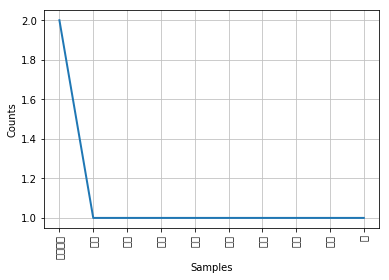

In [35]:
import matplotlib.pyplot as plt
from nltk import Text #nltk 라이브러리의 text 

# okt 라는 트윝 분석 패키지를 통해 명사들을 리스트로 가져와서.Text 인풋으로 넣어줌.
kolaw = Text(okt.nouns(law_corpus[:50]), name="kolaw")
kolaw.plot(30)
plt.show()

In [37]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 130963 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [91]:
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumGothic


In [0]:
fm._rebuild()

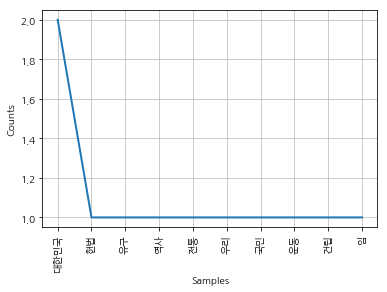

In [93]:
import matplotlib.pyplot as plt
from nltk import Text

kolaw = Text(okt.nouns(law_corpus[:50]), name="kolaw")
kolaw.plot(30)
plt.show()

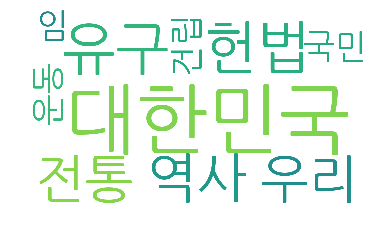

In [94]:
from wordcloud import WordCloud
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
wc = WordCloud(width = 1000, height = 600, background_color="white", font_path=font_path)
plt.imshow(wc.generate_from_frequencies(kolaw.vocab()))
plt.axis("off")
plt.show()

<H3>[실습] TDM 구축</H3>

In [0]:
# 참고 사이트: http://doc.mindscale.kr/km/unstructured/03.html
import pandas as pd

In [0]:
# 데이터 셋 다운로드: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences
df = pd.read_csv('http://www.cnudi.com/uploads/7/8/2/8/78281792/amazon_cells_labelled.txt', sep="\t", header=None)
# sep "\t"= 탭으로 구분하라, 리뷰를 쓸때 구분하기 쉽게
# head= none 헤더를 데이터로 넣지 않으려고
# 만약 나눠주지 않으면 데이터프레임 이라는 행 렬로 넣어야 하기때문에.
df.head()

In [113]:
# 댓글 및 긍/부정 점수 저장
content = df[0] # 내용
sentiment = df[1] # 평점 찬반

KeyError: ignored

In [0]:
# TDM 만들기
# TfidVectorizer로 저장할 것.모델의 설정 한 뒤 fit 하는 
#단어와 문장의 상관관계 모델, 기준

from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
# df[0], df[1]
# 주어진 df는 너무 크다 1000 X2 짜리
# 피쳐 엔지니어링을 해줘여 한다, 피쳐들을 뽑아주겠따는 말
#텍스트라는 수맣은 정보가진다. 즉 각각의 단어가 피쳐가 되는것으로 tfid를 사용하여 영문 띄어쓰기 기준, 소문자 1000개로 지정

In [0]:
tfidf = TfidfVectorizer(stop_words='english',
                        lowercase=True,
                        max_features=1000)

# english 띄워쓰기, 소문자 기준, 가장많이 나온 ㅈ단어 기준 1000 개

In [101]:
tdm = tfidf.fit_transform(content)
tdm
# 매트릭스 형태라는게 중요,
#1000개 기준으로 1000 by 1000
# 사실 element가 4060개 정도 의미있는 행렬을 가진다
# tfid 함수가 알아서 저장해줌,  티디엠 구축

<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 4060 stored elements in Compressed Sparse Row format>

In [102]:
tfidf.get_feature_names()[-10:]
# 이때 리스트 형으로 받아들여서 마지막 10개를 받아줘라 라는 뜻

['worthless',
 'worthwhile',
 'wouldn',
 'wow',
 'wrong',
 'wrongly',
 'year',
 'years',
 'yell',
 'yes']

In [103]:
check=pd.DataFrame(tdm)
check.head()


,0
0,"(0, 884)\t0.6336922128405843\n (0, 485)\t0...."
1,"(0, 912)\t0.6392095406476104\n (0, 255)\t0...."
2,"(0, 355)\t0.8909828883166824\n (0, 310)\t0...."
3,"(0, 518)\t0.3180236844892277\n (0, 407)\t0...."
4,"(0, 405)\t0.8844341363224174\n (0, 310)\t0...."


In [0]:
# 수치 데이터의 효율적인 처리를 위한 joblib 사용
from sklearn.externals import joblib

In [0]:
# TDM 저장
with open('amazon.pkl','wb') as f:
  joblib.dump(
      {'vectorizer': tfidf, 'tdm':tdm, 'sentiment':sentiment}, 
      f  
  )

In [106]:
tfidf

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=1000,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [0]:
# 데이터 다운로드: https://www.data.go.kr/dataset/15012945/fileData.do
# 인공지능 관련 뉴스메타데이터(2013.01.01-2017.08.31)
df = pd.read_csv('http://www.cnudi.com/uploads/7/8/2/8/78281792/ai_news_data.csv',
                 encoding='cp949',
                 engine='python')

In [108]:
df.shape

(47917, 18)

In [109]:
df.columns

Index(['주소', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '개체명(인물)', '개체명(지역)',
       '개체명(기업/기관)', '키워드', '특성추출', '본문', '원본주소'],
      dtype='object')

In [110]:
df['본문'].head()

0    지난해 모바일 게임 열풍에 잠시 주춤했던 온라인 게임이 새해를 맞아 화려한 반격을 ...
1    2010년을 원년으로 스마트 미디어 시대가 현실화 되고 있다. 최근 국내 스마트폰 ...
2    손오공은 1월 4일부터 3월 8일까지 '스타크래프트2' 시리즈의 첫 번째 확장팩인 ...
3    지식서비.. 모바일이나 일부 웹 포털을 중심으로 지식분류정보를 제공하기 위한 시맨틱...
4    '너 ~ 무'오래간만입니다. 트리플A입니다. 창간 특집호 발행으로 잠깐 쉰다는 것이...
Name: 본문, dtype: object

In [0]:
# Scikit-learn에서 제공하는 TDM 만드는 모듈인 CountVectorizer 사용
# Scikit-learn 문서 전처리 설명: https://datascienceschool.net/view-notebook/3e7aadbf88ed4f0d87a76f9ddc925d69/
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
cv = CountVectorizer()

In [0]:
cv = CountVectorizer(max_features=1000) # 가장많은 단어를 뽑아서 indicies 와 data를 뽑아낼수있다.

In [0]:
tdm = cv.fit_transform(df['본문'])

In [0]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf = TfidfTransformer()
tdm2 = tfidf.fit_transform(tdm)

In [0]:
words = cv.get_feature_names()## 리스트로 만들어라, 0 부터 999

In [86]:
for i, n in sorted(zip(tdm[0].indices, tdm[0].data)): # tdm 인덱스 안에서 돌아가는 것임. zip해서 i n 같이 증가.
    print(words[i], n)

    
# tdm 은 행 기준으로, 매트릭스라서 예를들어 tdm[5000] 이면 에러. 4700 정도가 있기에.
# tdm [ n]의 문서에 있는 문장들을 단어로 나눠서. tdm.data 로 카운트.

# sparse 데이터를 저장할때. data,indicies 용어를쓴다 어느 위치에 어느값이 있느냐.

ai 1
개발 1
게임 1
높은 1
다양한 1
등이 1
맞아 1
모바일 1
시작으로 1
온라인 1
올해 1
인공지능 1
있다 1
자체 1
중인 1
지난해 1
특히 1
활용한 1


In [88]:
for i, n in sorted(zip(tdm2[0].indices, tdm2[0].data)):
    print(words[i], n)
    
    # 가중치를 조정해주는 방식 tfid

ai 0.09586769946267382
개발 0.22198631078309491
게임 0.27730113623401387
높은 0.26963195836520115
다양한 0.2037268914928003
등이 0.2331881858346565
맞아 0.28262295321402287
모바일 0.22732047438991726
시작으로 0.32460801804202744
온라인 0.27792786700067257
올해 0.21485414738057215
인공지능 0.06306778670476233
있다 0.11855306074510354
자체 0.2865566696128468
중인 0.28410820931564507
지난해 0.22176855887870148
특히 0.2326846184448694
활용한 0.22701954260884397


<H3>단어 빈도 계산 및 시각화</H3>

In [89]:
# 수치 데이터의 효율적인 처리를 위한 joblib 사용
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
# 앞서 저장한 TDM 데이터 로딩
with open('amazon.pkl','rb') as f:
  data = joblib.load(f)

In [0]:
locals().update(data)

In [0]:
# 단어 사용 합 구하기
# 모든문장 마다 열에 따라 합치기.
count = tdm.sum(axis=0)

In [120]:
# 단어 빈도 표 만들기
import pandas as pd

word_count = pd.DataFrame({
    '단어': cv.get_feature_names(),
    '빈도': count.flat})

/usr/local/lib/python3.6/dist-packages/pandas/core/dtypes/dtypes.py:458: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if string == 'category':


In [121]:
# 마지막 다섯 행을 확인
word_count.tail()

,단어,빈도
995,회사는,0.396701
996,회장,3.274197
997,회장은,3.972779
998,회장이,0.539954
999,힘을,0.638298


In [122]:
# 단어 빈도 순 정렬
sorted_df = word_count.sort_values('빈도', ascending=False)
sorted_df.head()

,단어,빈도
459,본격적인,46.663864
310,대통령은,40.657307
306,대응,29.231608
522,삼성전자가,23.608777
985,호텔에서,21.664389


In [0]:
# 워드 클라우드
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# %matplotlib inline # This will use Matplotlib's interactive Qt UI in a floating window to the side of your browser.

In [0]:
word_count_dict = dict(zip(word_count['단어'], word_count['빈도']))

In [125]:
list(word_count_dict.items())[100], list(word_count_dict.items())[200]

(('mwc', 2.8419500431604723), ('교육', 0.9853996266881804))

In [0]:
wc = WordCloud(background_color='white', width=400, height=200)

In [0]:
cloud = wc.fit_words(word_count_dict)

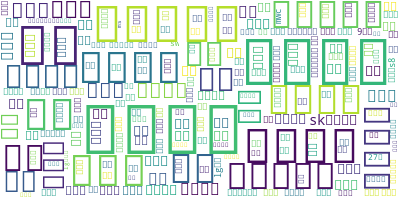

In [128]:
cloud.to_image()

In [0]:
kor_wc = WordCloud(background_color='white', width=400, height=200,
                   font_path='/usr/share/fonts/truetype/nanum/NanumGothic.ttf')

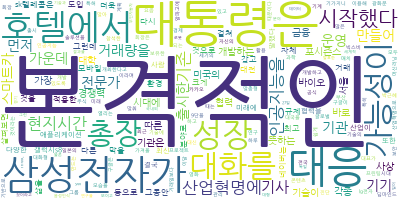

In [130]:
kor_cloud = kor_wc.fit_words(word_count_dict)
kor_cloud.to_image()

<H3>문서 유사도 측정 및 군집화</H3>

# 단어는 중요한 순서대로 랭킹을매기고 만들어 보는 방향
문서들 간의 유사도를 계산해서 어떤 문서들이 비슷한지 찾아야한다. 행과 열을 바꿔서 axis 바꿔서 그림그릴수있다.

1.   유클리드
2.   코사인
1.   맨해튼
2.  자카드





In [0]:
# 참고 자료: http://doc.mindscale.kr/km/unstructured/04.html
def get_nouns():
    pass

In [0]:
# 앞서 저장한 TDM 데이터 로딩
#with open('amazon.pkl','rb') as f:
#  data = joblib.load(f)
locals().update(data)

In [0]:
# 데이터 다운로드: https://www.data.go.kr/dataset/15012945/fileData.do
# 인공지능 관련 뉴스메타데이터(2013.01.01-2017.08.31)
article = pd.read_csv('http://www.cnudi.com/uploads/7/8/2/8/78281792/ai_news_data.csv',
                 encoding='cp949',
                 engine='python')

#관심있는 데이터 보면된다

In [0]:
from sklearn.metrics.pairwise import euclidean_distances
#서로다른 두 문서들의 거리를 계산

In [137]:
euclidean_distances(tdm[0],tdm[1]) # 각각에 대한 차의 제곱 합.

array([[1.41421356]])

In [0]:
import numpy as np

In [150]:
# 0 번 문서와 1번문서 부터 마지막 문서까지의 거리를 계산
# argmin 가능한 모든 디스턴스에서 미니멈값을 찾아라. 
# 즉 22번째 애랑 가깝다.
dist = euclidean_distances(tdm[0], tdm[1:]) # 일반 매트릭스 행렬이 아니다. 행을고려해라.
np.argmin(dist)+1

22

In [143]:
article.columns

Index(['주소', '일자', '언론사', '기고자', '제목', '통합 분류1', '통합 분류2', '통합 분류3',
       '사건/사고 분류1', '사건/사고 분류2', '사건/사고 분류3', '개체명(인물)', '개체명(지역)',
       '개체명(기업/기관)', '키워드', '특성추출', '본문', '원본주소'],
      dtype='object')

In [144]:
article.loc[0, '본문']

'지난해 모바일 게임 열풍에 잠시 주춤했던 온라인 게임이 새해를 맞아 화려한 반격을 준비하고 있다. 새해 벽두 ‘아키에이지’를 시작으로 다양한 장르의 게임들이 줄줄이 론칭을 기다린다. 특히 올해 출격을 준비 중인 게임들은 하나같이 뛰어난 완성도와 개성 넘치.. 자체 개발 엔진인 크라이엔진3를 활용한 완성도 높은 그래픽, 인공지능(AI), 물리효과 등이 특징이다.'

In [146]:
# artile0 번과 가깝다고 본 거를 들고옴.
# pandas dataframe과 tdm 은 열이 바뀔뿐 행은 바뀌지 않음
article.loc[21, '본문']

'지식경제부는 정보기술(IT)산업의 성장 동력 확보를 위해 1조 2833억원의 예산을 지원한다고 10일 밝혔다. 올해 지원 규모는 지난해 1조 2632억원보다 1.2%(148억원)이 증가한 것으로, 소프트웨어.. 특히 IT 핵심기술로 선정된 차세대 디바이스, 빅데이터 및 인공지능, 하이브리드 스토리지, 유무선 통합 네트워크, 라이브케어 로봇 등에 중점 투자된다.'

In [0]:
from sklearn.metrics.pairwise import cosine_similarity
#각 문서 벡터의 값을 내적. 

In [151]:
sim = cosine_similarity(tdm[0],tdm[1:])
np.argmax(sim)+1

327

In [152]:
article.loc[327,'본문']

'［헤럴드경제=성연진 기자］동양증권은 유망종목을 실시간으로 발굴해 추천해주는 ‘MY tRadar’ 서비스를 매수와 매도 타이밍을 알려주고 추천 포..“상승 유망종목을 발굴, 추천하는데 그치지 않고, 추천종목 매매전략을 제시하고 사고 팔 타이밍까지 포착해 추천 모델 포트폴리오대로 실제 매매를 해주는 혁신적인 인공지능 실전 투자시스템으로 진화시켜 나가는 중”이라며 '

In [0]:
# 유사 문서 군집화
from sklearn.cluster import KMeans

In [0]:
km = KMeans(n_clusters=4, random_state=1234) # 클러스트 갯수와 랜덤시드

In [0]:
labels = km.fit_predict(tdm2)

In [0]:
# 각 클러스터별로 많이 나온 단어들을 확인
from operator import itemgetter

In [0]:
words = vectorizer.get_feature_names()

def top10(labels):
    freq_words = []
    for i in range(4):
        count = tdm[labels == i, :].sum(axis=0)
        ws = [w for w, n in sorted(zip(words, count.flat), key=itemgetter(1), reverse=True)[:10]]
        freq_words.append(ws)

    return pd.DataFrame(freq_words)

In [0]:
top10(labels)

<H3>LSA와 LDA</H3>

TDM 한계의 극복


1.   고양이 좋다,  강아지 귀엽다 = 같은거리
TDM +SVM=  마진을 최대로 함, 잠재된 의미 분석



In [5]:
import pandas as pd
from sklearn.externals import joblib

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
with open('amazon.pkl', 'rb') as f:
    data = joblib.load(f)
locals().update(data)

In [7]:
tdm.shape

(1000, 1000)

In [0]:
# LSA 적용
# 적당한차원축소를 해볼수있따

from sklearn.decomposition import TruncatedSVD

In [0]:
svd = TruncatedSVD(n_components=30)

In [0]:
pos = svd.fit_transform(tdm)

In [12]:
pos.shape

(1000, 30)

In [0]:
import matplotlib.pyplot as plt

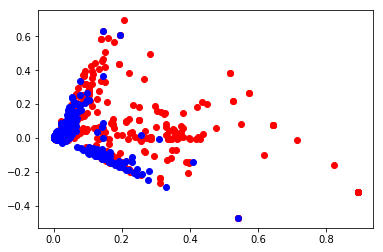

In [14]:
dim1 = 0
dim2 = 1
plt.plot(pos[sentiment == 1, dim1], pos[sentiment == 1, dim2], 'ro')  # 긍정적인 코멘트 (빨간색)
plt.plot(pos[sentiment == 0, dim1], pos[sentiment == 0, dim2], 'bo')  # 부정적인 코멘트 (파란색)

In [0]:
# 정규화(Normalizing)
# LSA로 만들어진 좌표를 원점에서 거리가 1이 되도록 변환
from sklearn.preprocessing import Normalizer

In [0]:
norm = Normalizer(copy=False)

In [0]:
pos2 = norm.fit_transform(pos)

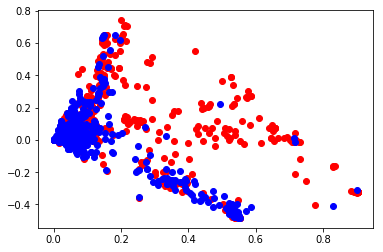

In [18]:
dim1 = 0
dim2 = 1
plt.plot(pos2[sentiment == 1, dim1], pos2[sentiment == 1, dim2], 'ro')  # 긍정적인 코멘트 (빨간색)
plt.plot(pos2[sentiment == 0, dim1], pos2[sentiment == 0, dim2], 'bo')  # 부정적인 코멘트 (파란색)

In [0]:
# 파이프라인 만들기: 2단계 변환 한 번에 처리하기
from sklearn.pipeline import make_pipeline

In [0]:
lsa = make_pipeline(svd, norm)

In [21]:
lsa.transform(tdm)

array([[ 0.09971282,  0.03567335,  0.02905501, ...,  0.06446791,
         0.2964367 ,  0.2636302 ],
       [ 0.14552865,  0.45860432,  0.27678222, ...,  0.01593035,
        -0.05483136, -0.03190535],
       [ 0.71744987, -0.01377408, -0.52298271, ..., -0.02601985,
        -0.0379748 ,  0.02965867],
       ...,
       [ 0.06543608,  0.03776215,  0.02675321, ...,  0.12240476,
         0.01132097,  0.08582994],
       [ 0.05617956,  0.01234119,  0.07467237, ..., -0.37775526,
        -0.53420097, -0.11759391],
       [ 0.06128419,  0.00747636,  0.03518605, ...,  0.30468309,
        -0.1248448 , -0.09126215]])

In [22]:
# LDA 적용
!pip install gensim

In [0]:
import pandas as pd
from sklearn.externals import joblib

In [0]:
def get_nouns():
    pass

In [0]:
locals().update(data)

In [0]:
# 데이터 다운로드: https://www.data.go.kr/dataset/15012945/fileData.do
# 인공지능 관련 뉴스메타데이터(2013.01.01-2017.08.31)
article = pd.read_csv('http://www.cnudi.com/uploads/7/8/2/8/78281792/ai_news_data.csv',
                 encoding='cp949',
                 engine='python')

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
cv = CountVectorizer(max_features=1000)

In [0]:
words = cv.get_feature_names()

NotFittedError: ignored

In [0]:
word_dict = dict(enumerate(words))

In [0]:
word_dict[100], word_dict[200]

('awesome', 'date')

In [0]:
# gensim 형식으로 변환
from gensim.matutils import Sparse2Corpus

In [0]:
corpus = Sparse2Corpus(tdm.T)
corpus

In [0]:
from gensim.models.ldamodel import LdaModel

In [0]:
lda = LdaModel(corpus=corpus,
               num_topics=100,
               passes=3,
               iterations=100,
               id2word=word_dict,
               random_state=123)

In [0]:
# 토픽 별 단어 확인
lda.show_topic(0)

In [0]:
lda.show_topic(2)

In [0]:
# 문서 주제 확인
row = tdm[0]
doc = list(zip(row.indices, row.data))
doc

In [0]:
doc_words = [(words[i], n) for i, n in doc]
doc_words

In [0]:
# 토픽 비율 확인
lda.get_document_topics(doc)

In [0]:
lda.show_topic(14)

In [0]:
# 모형 저장
lda.save('lda_test.lda')

In [0]:
# 모형 로딩
lda2 = LdaModel.load('lda_test.lda')